**Module import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

**Data import**

In [2]:
hipc_df = pd.read_csv("./Data/hipc_df.csv")
N = len(hipc_df)
labels = hipc_df['Label'].to_numpy()
patient_labels =  hipc_df['Patient'].to_numpy()
labs_labels = hipc_df["Lab"].to_numpy()

In [3]:
labs = ["W2", "D54", "FTV", "IU", "O0", "pw", "pM"]
markers = ['.', '^', '<', 's', '*', 'P', 'd']

patient1 = mpatches.Patch(color='blue', label='Patient 1')
patient2 = mpatches.Patch(color='red', label='Patient 2')
patient3 = mpatches.Patch(color='green', label='Patient 3')
handles = [patient1, patient2, patient3]
for i in range(len(markers)) :
    handles.append(Line2D([0], [0], label=labs[i], marker=markers[i], markersize=10,  linestyle=''))

colors_dict={"1" : 'blue',
"2" : 'red', 
"3" : 'green'}

markers_dict = dict(zip(labs, markers))

# Compositional data analysis

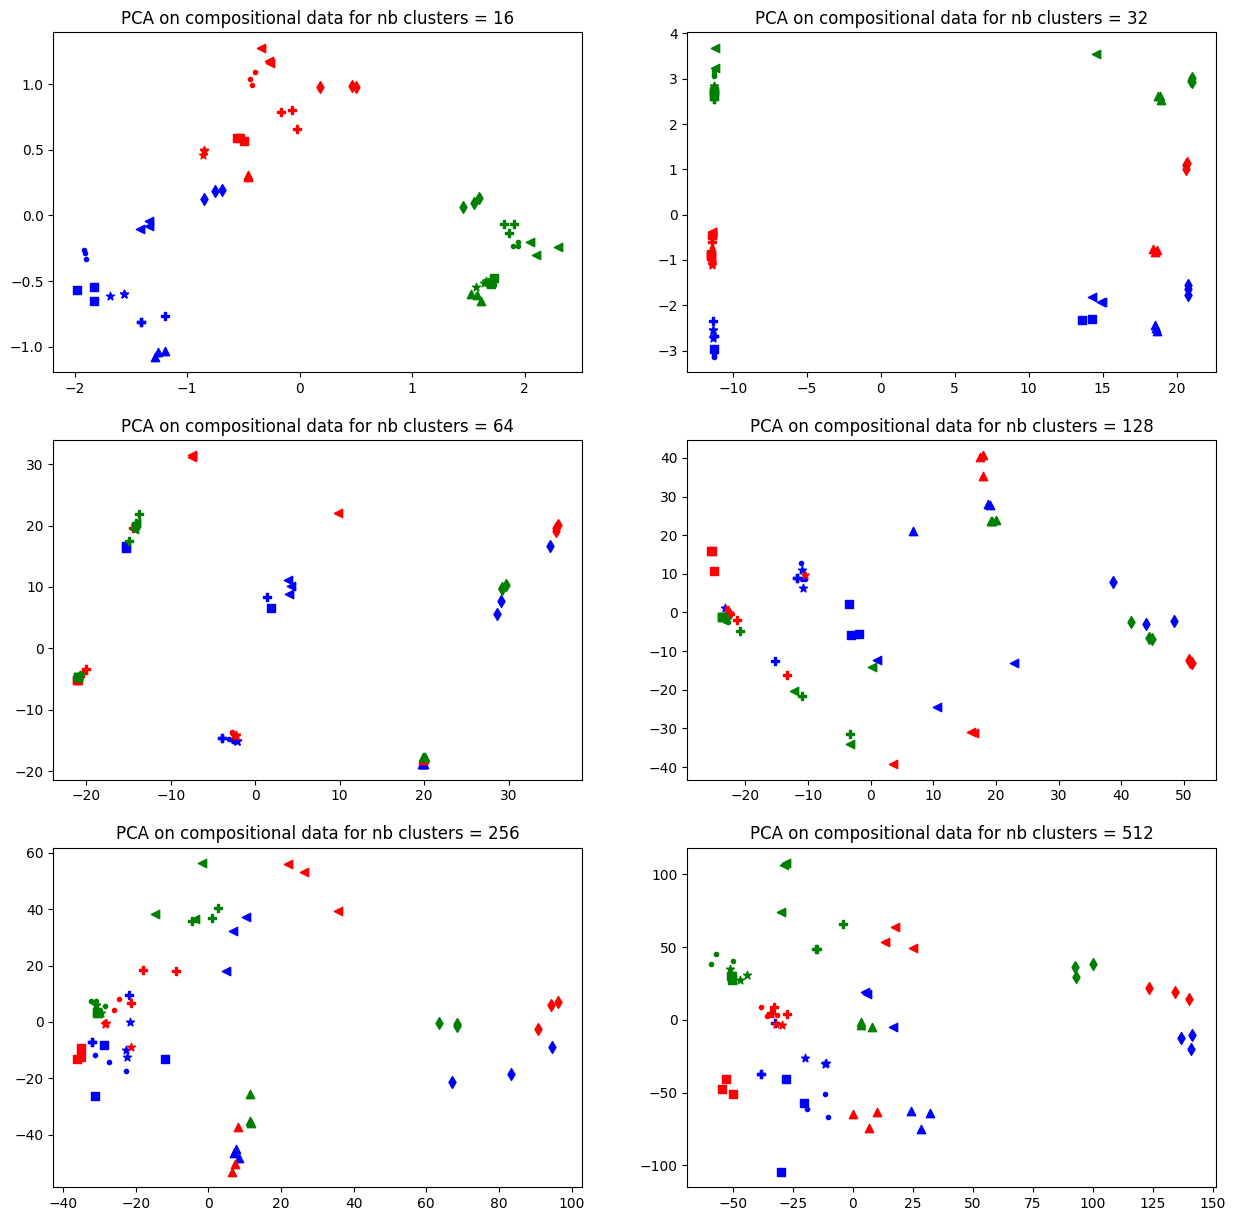

In [5]:
fig, ax = plt.subplots(figsize=(15,15), nrows = 3, ncols = 2)

for k,K in enumerate([16,32,64,128,256, 512]) :
    pca_comp = np.load("./Results/PCA/pca_weights_lr_Kmeans_K"+str(K)+".npy")
    for i in range(N) :
        ax[k//2][k%2].scatter(pca_comp[i,0], pca_comp[i,1], c=colors_dict[str(patient_labels[i])], marker=markers_dict[str(labs_labels[i])])
       
    ax[k//2][k%2].set_title("PCA on compositional data for nb clusters = "+str(K))

plt.savefig("./Results/images/choice_nb_clusters_PCA_KMeans.png")

# Linearized data analysis

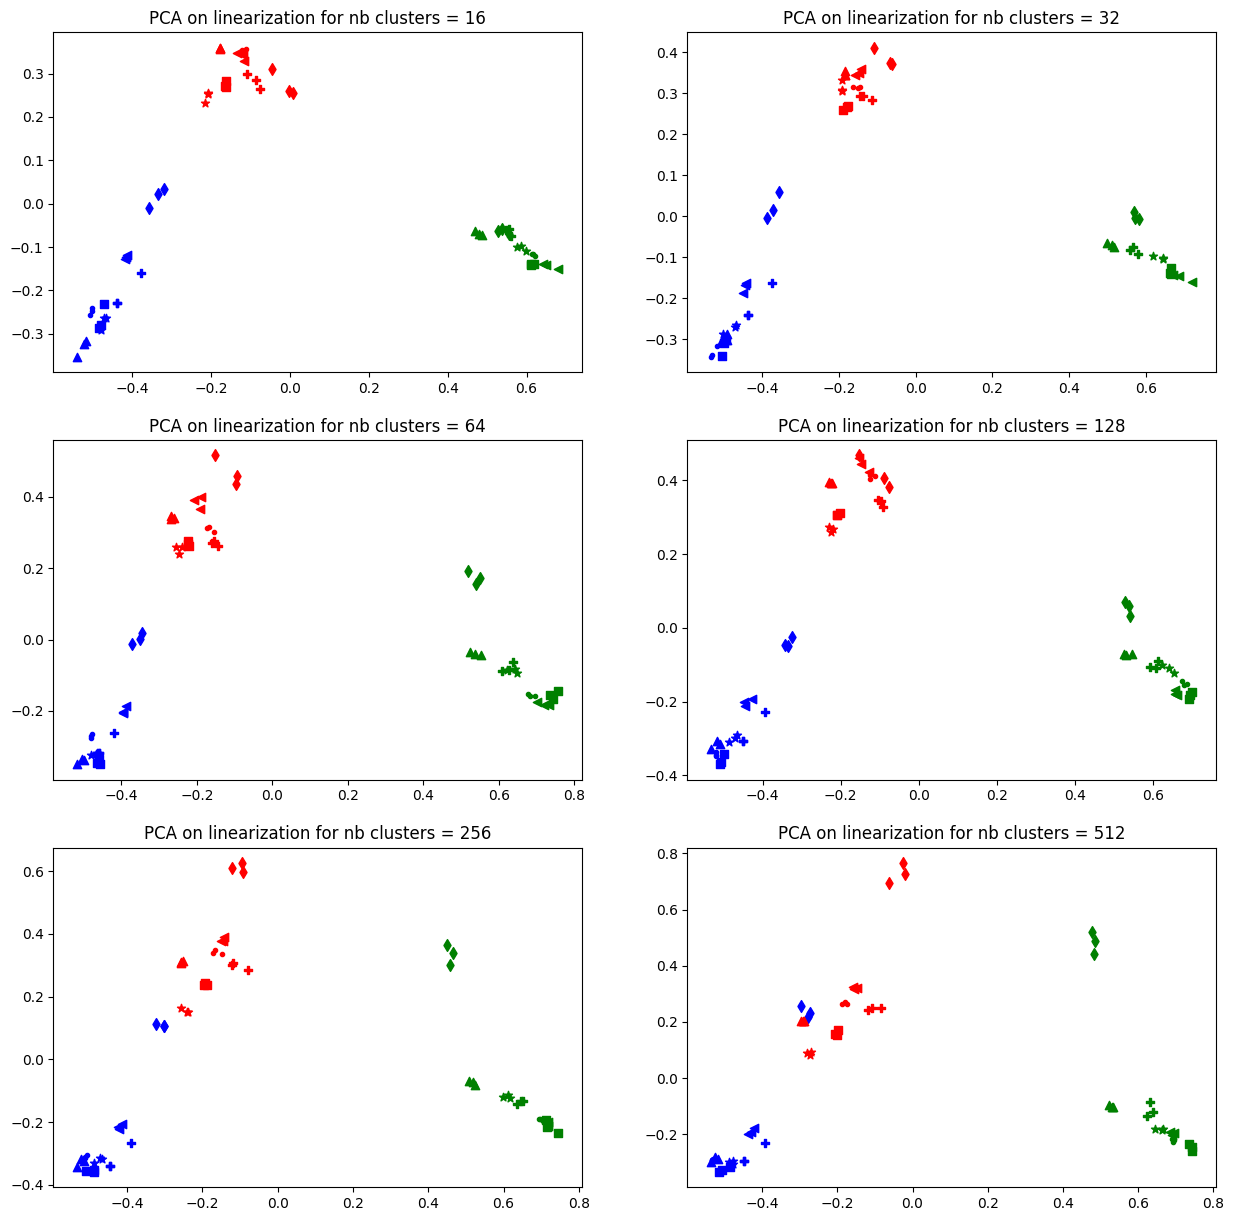

In [6]:
fig, ax = plt.subplots(figsize=(15,15), nrows = 3, ncols = 2)

for k,K in enumerate([16,32,64,128,256, 512]) :
    pca_linW2 = np.load("./Results/PCA/pca_linW2_W2bary_Kmeans_K"+str(K)+".npy")
    for i in range(N) :
        ax[k//2][k%2].scatter(pca_linW2[i,0], pca_linW2[i,1], c=colors_dict[str(patient_labels[i])], marker=markers_dict[str(labs_labels[i])])
       
    ax[k//2][k%2].set_title("PCA on linearization for nb clusters = "+str(K))

#plt.savefig("./images/K"+str(64)+"_PCA_LOT_globalKMeans.png")